In [ ]:
!pip install scikit-fuzzy --silent

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.7 MB/s eta 0:00:00
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34460 sha256=9342c5ee2ff9f575da6177ae6e398be7ef1bb2b4a0670585d4fc7f3b640ef297
  Stored in directory: /root/.cache/pip/wheels/bc/e0/13/9d21ea8729ace98b0782d861d53f4b33f535b5ce50d997d9c9
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3318 sha256=b364ce598e3506ba269501244364d32e2b83a0fc54279dda6e0f9632d6ebb544
  Stored in directory: /root/.cache/pip/wheels/cd/3d/45/a8945af45d38bcd64779802591930d5f01c73650c98b6e120c
Successfully built clint args


Input: Suhu=30°C, Kelembapan=70%
Output Kecepatan Kipas (Defuzzified): 59.79%


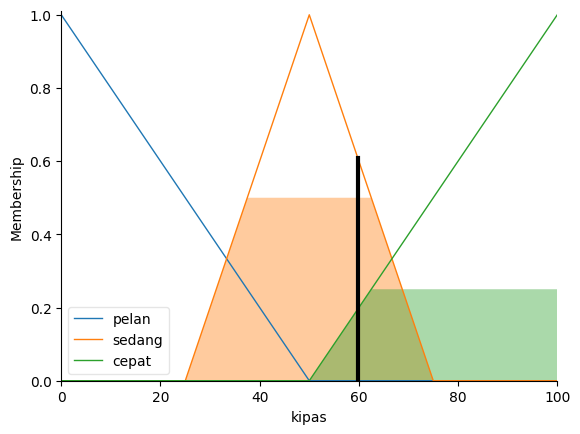

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ==========================================
# 1. DEFINISI VARIABEL (ANTECEDENT & CONSEQUENT)
# ==========================================
# Input
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'suhu')
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembapan')

# Output
kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kipas')

# ==========================================
# 2. MEMBERSHIP FUNCTIONS (FUNGSI KEANGGOTAAN)
# ==========================================
# Suhu [Dingin, Hangat, Panas]
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 20])
suhu['hangat'] = fuzz.trimf(suhu.universe, [15, 25, 35])
suhu['panas']  = fuzz.trimf(suhu.universe, [30, 40, 40])

# Kelembapan [Rendah, Sedang, Tinggi]
kelembapan['rendah'] = fuzz.trimf(kelembapan.universe, [0, 0, 40])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [30, 50, 70])
kelembapan['tinggi'] = fuzz.trimf(kelembapan.universe, [60, 100, 100])

# Kipas [Pelan, Sedang, Cepat]
kipas['pelan']  = fuzz.trimf(kipas.universe, [0, 0, 50])
kipas['sedang'] = fuzz.trimf(kipas.universe, [25, 50, 75])
kipas['cepat']  = fuzz.trimf(kipas.universe, [50, 100, 100])

# Opsional: Set metode defuzzifikasi (defaultnya 'centroid')
# kipas.defuzzify_method = 'centroid'

# ==========================================
# 3. ATURAN FUZZY (RULE BASE)
# ==========================================
# Rule 1: IF Suhu dingin OR Kelembapan rendah THEN Kipas pelan
# Operator OR menggunakan tanda pipe (|), Operator AND menggunakan (&)
rule1 = ctrl.Rule(suhu['dingin'] | kelembapan['rendah'], kipas['pelan'])

# Rule 2: IF Suhu hangat THEN Kipas sedang
rule2 = ctrl.Rule(suhu['hangat'], kipas['sedang'])

# Rule 3: IF Suhu panas OR Kelembapan tinggi THEN Kipas cepat
rule3 = ctrl.Rule(suhu['panas'] | kelembapan['tinggi'], kipas['cepat'])

# Masukkan semua rule ke dalam Control System
system_control = ctrl.ControlSystem([rule1, rule2, rule3])
simulasi = ctrl.ControlSystemSimulation(system_control)

# ==========================================
# 4. SIMULASI & VISUALISASI HASIL
# ==========================================
# Contoh Kasus sesuai PDF: Suhu 30, Kelembapan 70
simulasi.input['suhu'] = 30
simulasi.input['kelembapan'] = 70

# Hitung (Crunch the numbers)
simulasi.compute()

# Ambil hasil defuzzifikasi
hasil_akhir = simulasi.output['kipas']
print(f"Input: Suhu=30°C, Kelembapan=70%")
print(f"Output Kecepatan Kipas (Defuzzified): {hasil_akhir:.2f}%")

# Visualisasi Hasil (Area yang diarsir & garis centroid)
# Syntax .view(sim=...) akan otomatis menggambar grafik hasil inferensi
kipas.view(sim=simulasi)

plt.show()

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# --- 1. Universe & Membership Functions ---
# Mendefinisikan rentang nilai (Universe of Discourse)
suhu = np.arange(0, 41, 1)      # 0 sampai 40
kelembapan = np.arange(0, 101, 1) # 0 sampai 100
kipas = np.arange(0, 101, 1)    # 0 sampai 100

# Membership Function Suhu (Triangular)
suhu_dingin = fuzz.trimf(suhu, [0, 0, 20])
suhu_hangat = fuzz.trimf(suhu, [15, 25, 35])
suhu_panas = fuzz.trimf(suhu, [30, 40, 40])

# Membership Function Kelembapan (Triangular)
hum_rendah = fuzz.trimf(kelembapan, [0, 0, 40])
hum_sedang = fuzz.trimf(kelembapan, [30, 50, 70])
hum_tinggi = fuzz.trimf(kelembapan, [60, 100, 100])

# Membership Function Kipas (Output)
kipas_pelan = fuzz.trimf(kipas, [0, 0, 50])
kipas_sedang = fuzz.trimf(kipas, [25, 50, 75])
kipas_cepat = fuzz.trimf(kipas, [50, 100, 100])

# --- 2. Fungsi Interaktif (Logika Utama) ---
def fuzzy_mamdani(suhu_val, kelembapan_val):

    # --- Fuzzifikasi ---
    # Menghitung derajat keanggotaan input terhadap himpunan fuzzy
    mu_suhu_dingin = fuzz.interp_membership(suhu, suhu_dingin, suhu_val)
    mu_suhu_hangat = fuzz.interp_membership(suhu, suhu_hangat, suhu_val)
    mu_suhu_panas = fuzz.interp_membership(suhu, suhu_panas, suhu_val)

    mu_hum_rendah = fuzz.interp_membership(kelembapan, hum_rendah, kelembapan_val)
    mu_hum_sedang = fuzz.interp_membership(kelembapan, hum_sedang, kelembapan_val)
    mu_hum_tinggi = fuzz.interp_membership(kelembapan, hum_tinggi, kelembapan_val)

    # --- 3. Aturan Fuzzy (Mamdani) ---

    # Rule 1: IF Suhu dingin OR Kelembapan rendah THEN Kipas pelan
    # Operator OR menggunakan np.fmax (Maximum)
    alpha1 = np.fmax(mu_suhu_dingin, mu_hum_rendah)

    # Rule 2: IF Suhu hangat THEN Kipas sedang
    alpha2 = mu_suhu_hangat

    # Rule 3: IF Suhu panas OR Kelembapan tinggi THEN Kipas cepat
    alpha3 = np.fmax(mu_suhu_panas, mu_hum_tinggi)

    # --- 4. Implikasi (Clipping) ---
    # Memotong kurva output berdasarkan nilai alpha (derajat kebenaran rule)
    pelan_clipped = np.fmin(alpha1, kipas_pelan)
    sedang_clipped = np.fmin(alpha2, kipas_sedang)
    cepat_clipped = np.fmin(alpha3, kipas_cepat)

    # --- 5. Agregasi Output ---
    # Menggabungkan semua area yang sudah di-clip (Union / Maximum)
    aggregated = np.fmax(pelan_clipped, np.fmax(sedang_clipped, cepat_clipped))

    # --- 6. Defuzzifikasi ---
    # Mengubah himpunan fuzzy gabungan menjadi nilai tegas (crisp)
    centroid = fuzz.defuzz(kipas, aggregated, 'centroid')
    bisector = fuzz.defuzz(kipas, aggregated, 'bisector')
    mom = fuzz.defuzz(kipas, aggregated, 'mom') # Mean of Maximum

    # --- 7. Visualisasi ---
    plt.figure(figsize=(8, 4))

    # Plot Membership Function Output
    plt.plot(kipas, kipas_pelan, 'b--', label='Pelan')
    plt.plot(kipas, kipas_sedang, 'g--', label='Sedang')
    plt.plot(kipas, kipas_cepat, 'r--', label='Cepat')

    # Plot Area Aggregated (Hasil Fuzzy)
    plt.fill_between(kipas, aggregated, alpha=0.4, color='orange', label='Aggregated')

    # Garis hasil defuzzifikasi
    plt.axvline(centroid, color='k', linestyle='-.', label=f'Centroid = {centroid:.1f}%')
    plt.axvline(bisector, color='purple', linestyle=':', label=f'Bisector = {bisector:.1f}%')
    plt.axvline(mom, color='brown', linestyle='--', label=f'MOM = {mom:.1f}%')

    plt.title(f"Suhu={suhu_val:.1f}°C, Kelembapan={kelembapan_val:.1f}%")
    plt.xlabel("Kecepatan Kipas (%)")
    plt.ylabel("Derajat Keanggotaan")
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
    plt.show()

    # Print hasil
    print(f"Defuzzifikasi:")
    print(f" Centroid = {centroid:.2f}%")
    print(f" Bisector = {bisector:.2f}%")
    print(f" MOM      = {mom:.2f}%")

# --- 8. Widget Interaktif ---
interact(
    fuzzy_mamdani,
    suhu_val=FloatSlider(value=30, min=0, max=40, step=1, description='Suhu (°C)'),
    kelembapan_val=FloatSlider(value=70, min=0, max=100, step=1, description='Kelembapan (%)')
);

interactive(children=(FloatSlider(value=30.0, description='Suhu (°C)', max=40.0, step=1.0), FloatSlider(value=…